In [37]:
# %load ../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pydot
from IPython.display import Image

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, BaggingRegressor, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error,confusion_matrix, classification_report, roc_auc_score, precision_score

##Árvores de Decisão para Regressão

Importanto Base

In [38]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [39]:
df = pd.read_csv('/content/drive/MyDrive/Data/Hitters.csv').dropna()

#removendo colunas desnecessárias
df.drop(['Unnamed: 0','League','Division','NewLeague'], axis=1, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 263 entries, 1 to 321
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   AtBat    263 non-null    int64  
 1   Hits     263 non-null    int64  
 2   HmRun    263 non-null    int64  
 3   Runs     263 non-null    int64  
 4   RBI      263 non-null    int64  
 5   Walks    263 non-null    int64  
 6   Years    263 non-null    int64  
 7   CAtBat   263 non-null    int64  
 8   CHits    263 non-null    int64  
 9   CHmRun   263 non-null    int64  
 10  CRuns    263 non-null    int64  
 11  CRBI     263 non-null    int64  
 12  CWalks   263 non-null    int64  
 13  PutOuts  263 non-null    int64  
 14  Assists  263 non-null    int64  
 15  Errors   263 non-null    int64  
 16  Salary   263 non-null    float64
dtypes: float64(1), int64(16)
memory usage: 37.0 KB


Apresentando os dados

In [40]:
df

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


Estatísticas Resumo

In [41]:
df.describe()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
count,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000,263.000000
mean,403.642586,107.828897,11.619772,54.745247,51.486692,41.114068,7.311787,2657.543726,722.186312,69.239544,361.220532,330.418251,260.266160,290.711027,118.760456,8.593156,535.925882
std,147.307209,45.125326,8.757108,25.539816,25.882714,21.718056,4.793616,2286.582929,648.199644,82.197581,331.198571,323.367668,264.055868,279.934575,145.080577,6.606574,451.118681
min,19.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,19.000000,4.000000,0.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,67.500000
25%,282.500000,71.500000,5.000000,33.500000,30.000000,23.000000,4.000000,842.500000,212.000000,15.000000,105.500000,95.000000,71.000000,113.500000,8.000000,3.000000,190.000000
50%,413.000000,103.000000,9.000000,52.000000,47.000000,37.000000,6.000000,1931.000000,516.000000,40.000000,250.000000,230.000000,174.000000,224.000000,45.000000,7.000000,425.000000
75%,526.000000,141.500000,18.000000,73.000000,71.000000,57.000000,10.000000,3890.500000,1054.000000,92.500000,497.500000,424.500000,328.500000,322.500000,192.000000,13.000000,750.000000
max,687.000000,238.000000,40.000000,130.000000,121.000000,105.000000,24.000000,14053.000000,4256.000000,548.000000,2165.000000,1659.000000,1566.000000,1377.000000,492.000000,32.000000,2460.000000


Histograma da varíavel resposta ("Salary") e dos preditores Hits e Years.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4094179990>,
      dtype=object)

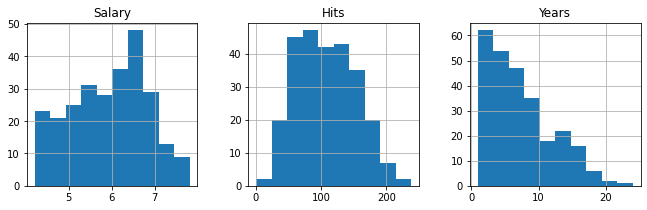

In [42]:
df.Salary = np.log(df.Salary)
df[['Salary','Hits','Years']].hist(figsize=(11,3),layout=(1,3))

Gráfico scatter plot de Hits e Years onde o pontos vermelhos são salários altos e os pontos verdes são salários baixos, verificamos a estrutura inicial dos dados.

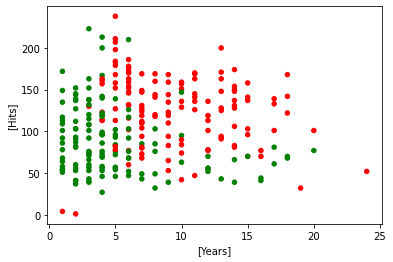

In [43]:
df.plot.scatter(y=['Hits'], x=['Years'], c = ['r' if x else 'g' for x in (df.Salary > 6)])

Estimando uma árvore de decisão com no máximo três folhas, usando a função DecisionTreeRegressor do pacote tree do Scikit Learn.

In [44]:
X = df[['Hits','Years']].values.reshape(-1,np.size([['Hits','Years']]))
y = df['Salary'].values.reshape(-1,1)

modelo = DecisionTreeRegressor(max_leaf_nodes=3)
modelo.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=3)

Plotando a árvore de decisão com a função export_graphviz do pacote graphviz.

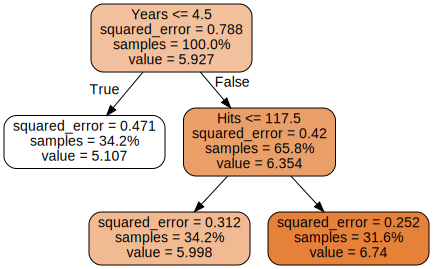

In [45]:
from graphviz import Source

dot_data = export_graphviz(modelo, out_file=None,
                                filled=True, rounded=True,
                                feature_names=['Hits','Years'],
                                proportion=True) 

graph = Source(dot_data)
graph

Definindo as partições de treino (70%) e validação (30%).

In [46]:
df_train, df_test = train_test_split(df,test_size=0.3, random_state=24)

X_train = df_train[['Hits','Years']].values.reshape(-1,np.size([['Hits','Years']]))
X_test = df_test[['Hits','Years']].values.reshape(-1,np.size([['Hits','Years']]))
y_train = df_train['Salary'].values.reshape(-1,1)
y_test = df_test['Salary'].values.reshape(-1,1)


Estimando uma árvore limitada a 3 nós terminais (folhas).

In [47]:
modelo = DecisionTreeRegressor(max_leaf_nodes=3, random_state=123)
modelo.fit(X_train, y_train)

print('Profundidade da árvore:', modelo.get_depth())
print('Número de folhas:', modelo.get_n_leaves() )

Profundidade da árvore: 2
Número de folhas: 3


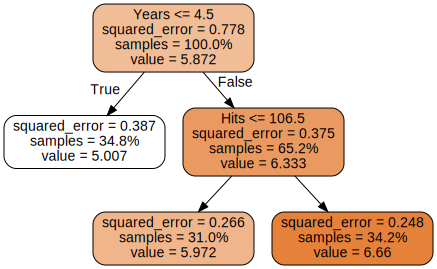

In [48]:
dot_data = export_graphviz(modelo, out_file=None,
                                filled=True, rounded=True,
                                feature_names=['Hits','Years'],
                                proportion=True) 

graph = Source(dot_data)
graph

Estimando uma árvore sem limitação de folhas.

In [49]:
modelo = DecisionTreeRegressor(random_state=123)
modelo.fit(X_train, y_train)

print('Profundidade da árvore:', modelo.get_depth())
print('Número de folhas:', modelo.get_n_leaves() )

Profundidade da árvore: 14
Número de folhas: 175


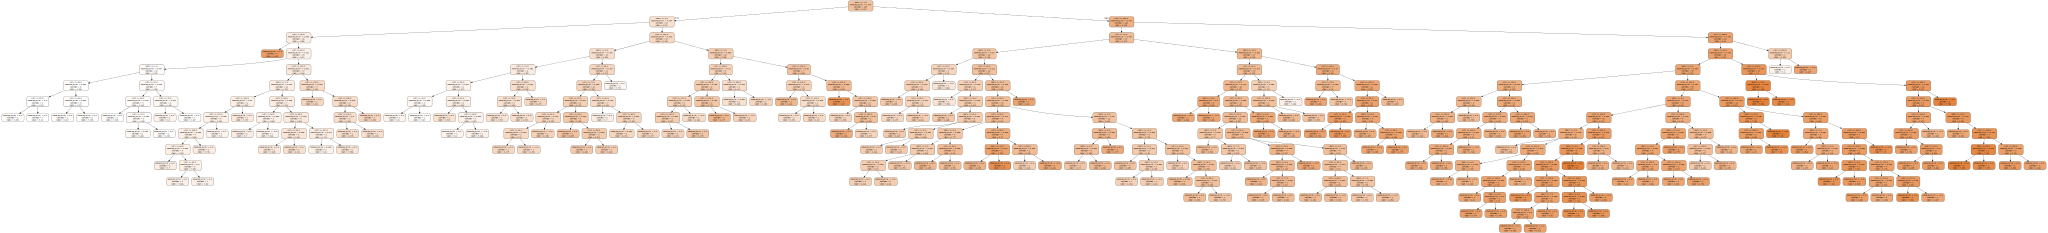

In [51]:
dot_data = export_graphviz(modelo, out_file=None,
                                filled=True, rounded=True,
                                feature_names=['Hits','Years'],
                                proportion=False) 

graph = Source(dot_data)
graph

Salvando a árvore como uma imagem!!!!

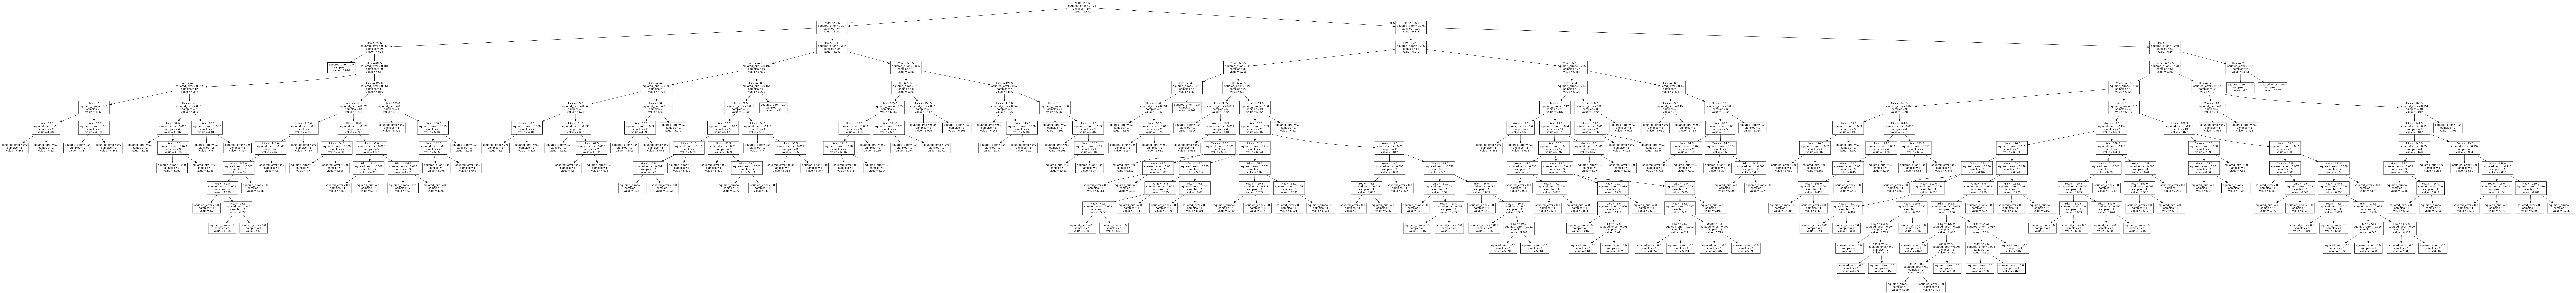

In [52]:
from os import system
from IPython.display import Image


dotfile = open("/content/drive/MyDrive/Data/pics/full_tree.dot", 'w')
export_graphviz(modelo, out_file = dotfile, feature_names = ['Hits','Years'])
dotfile.close()
system("dot -Tpng /content/drive/MyDrive/Data/pics/full_tree.dot -o /content/drive/MyDrive/Data/pics/full_tree.png")

Image(filename='/content/drive/MyDrive/Data/pics/full_tree.png') 

Avaliando a performance do modelo com o MSE.

In [53]:
y_train_pred = modelo.predict(X_train)
y_test_pred = modelo.predict(X_test)

MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)

print('Erro Treino:', MSE_train)
print('Erro Teste:', MSE_test)

Erro Treino: 0.002120635573504854
Erro Teste: 0.7239834949168437


Analizando vários valores possíveis de alpha para podar a árvore.

Text(0.5, 1.0, 'Total RSS vs effective alpha for training set')

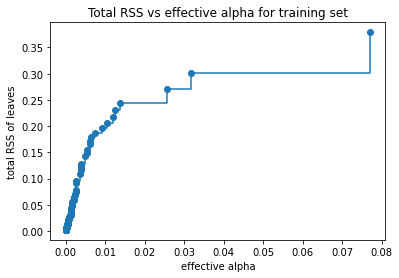

In [54]:
path = modelo.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total RSS of leaves")
ax.set_title("Total RSS vs effective alpha for training set")

Procurando o melhor alpha usando o método de validação cruzada (cross-validation).

In [55]:
from sklearn.model_selection import GridSearchCV

#vamos procura pelo melhor alpha usando valores de 0.001 até 1 com incrementos de 0.001.
params = {'ccp_alpha':list(np.arange(0.001,1.0,0.001))}

#utilizaremos 5 folds, k=5
cv = GridSearchCV(modelo, param_grid=params, scoring='neg_mean_squared_error',
                  n_jobs=None, refit=True, cv=5, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [56]:
cv.fit(X_train, y_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.003; total time=   0.0s
[CV] END ....................................

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                       0.007, 0.008, 0.009000000000000001,
                                       0.010000000000000002, 0.011, 0.012,
                                       0.013000000000000001,
                                       0.014000000000000002, 0.015, 0.016,
                                       0.017, 0.018000000000000002,
                                       0.019000000000000003, 0.02, 0.021,
                                       0.022000000000000002, 0.023, 0.024,
                                       0.025, 0.026000000000000002,
                                       0.027000000000000003, 0.028, 0.029,
                                       0.030000000000000002, ...]},
             pre_dispatch=None, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=2)

Armazendo os resultados da validação cruzada num Data Frame.

In [57]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ccp_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001901,0.000602,0.000377,0.000165,0.001,{'ccp_alpha': 0.001},-0.529531,-0.460363,-0.508344,-0.679743,...,-0.500276,0.114898,383,-0.022423,-0.026291,-0.018477,-0.023105,-0.031583,-0.024376,0.004378
1,0.001977,0.000497,0.000325,0.000072,0.002,{'ccp_alpha': 0.002},-0.528894,-0.413348,-0.445653,-0.667417,...,-0.474235,0.118247,357,-0.052965,-0.041965,-0.048869,-0.051509,-0.044868,-0.048035,0.004097
2,0.001898,0.000072,0.000336,0.000010,0.003,{'ccp_alpha': 0.003},-0.543269,-0.374621,-0.430271,-0.644226,...,-0.463707,0.115666,356,-0.079192,-0.065877,-0.075245,-0.073941,-0.058691,-0.070589,0.007358
3,0.001927,0.000230,0.000426,0.000184,0.004,{'ccp_alpha': 0.004},-0.508604,-0.386069,-0.387195,-0.650313,...,-0.453184,0.114068,355,-0.089337,-0.073101,-0.123270,-0.093696,-0.073589,-0.090599,0.018298
4,0.001893,0.000253,0.000320,0.000048,0.005,{'ccp_alpha': 0.005},-0.504120,-0.347466,-0.402596,-0.590782,...,-0.432702,0.101284,354,-0.107903,-0.126215,-0.132122,-0.107272,-0.105560,-0.115814,0.011089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0.001803,0.000056,0.000298,0.000019,0.995,{'ccp_alpha': 0.995},-0.765644,-0.811829,-0.704505,-0.868815,...,-0.781815,0.055248,434,-0.781289,-0.769707,-0.798341,-0.755311,-0.783868,-0.777703,0.014437
995,0.001823,0.000333,0.000302,0.000081,0.996,{'ccp_alpha': 0.996},-0.765644,-0.811829,-0.704505,-0.868815,...,-0.781815,0.055248,434,-0.781289,-0.769707,-0.798341,-0.755311,-0.783868,-0.777703,0.014437
996,0.002271,0.000583,0.000349,0.000077,0.997,{'ccp_alpha': 0.997},-0.765644,-0.811829,-0.704505,-0.868815,...,-0.781815,0.055248,434,-0.781289,-0.769707,-0.798341,-0.755311,-0.783868,-0.777703,0.014437
997,0.002457,0.000407,0.000386,0.000072,0.998,{'ccp_alpha': 0.998},-0.765644,-0.811829,-0.704505,-0.868815,...,-0.781815,0.055248,434,-0.781289,-0.769707,-0.798341,-0.755311,-0.783868,-0.777703,0.014437


Listando os campos da validação cruzada.

In [58]:
cv_results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       999 non-null    float64
 1   std_fit_time        999 non-null    float64
 2   mean_score_time     999 non-null    float64
 3   std_score_time      999 non-null    float64
 4   param_ccp_alpha     999 non-null    object 
 5   params              999 non-null    object 
 6   split0_test_score   999 non-null    float64
 7   split1_test_score   999 non-null    float64
 8   split2_test_score   999 non-null    float64
 9   split3_test_score   999 non-null    float64
 10  split4_test_score   999 non-null    float64
 11  mean_test_score     999 non-null    float64
 12  std_test_score      999 non-null    float64
 13  rank_test_score     999 non-null    int32  
 14  split0_train_score  999 non-null    float64
 15  split1_train_score  999 non-null    float64
 16  split2_t

Plotanto o erro médio quadrado para cada nível de alpha para a base de treino e validação.

Text(0, 0.5, 'MSE')

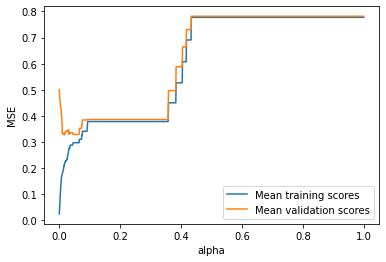

In [59]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_ccp_alpha'],
            -cv_results_df['mean_train_score'],
            label='Mean training scores')
ax.errorbar(cv_results_df['param_ccp_alpha'],
            -cv_results_df['mean_test_score'],
            label='Mean validation scores')
ax.legend()
plt.xlabel('alpha')
plt.ylabel('MSE')

Melhor parâmetro estimado pela validação cruzada.

In [60]:
cv.best_params_

{'ccp_alpha': 0.018000000000000002}

Características da árvore do melhor estimador.

In [61]:
print('Profundida da árvore:', cv.best_estimator_.get_depth())
print('Número de folhas:', cv.best_estimator_.get_n_leaves())

Profundida da árvore: 3
Número de folhas: 5


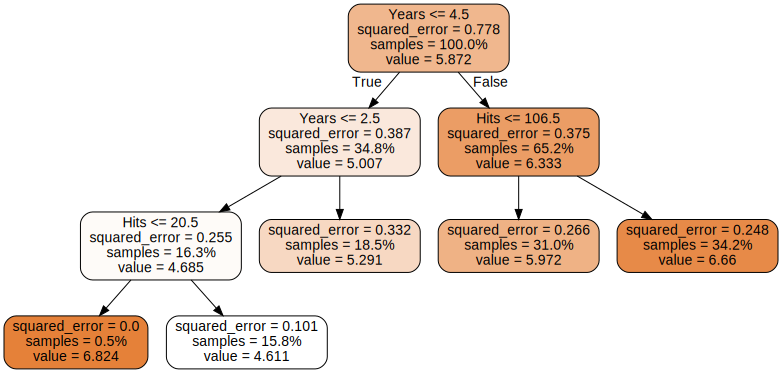

In [62]:
dot_data = export_graphviz(cv.best_estimator_, out_file=None,
                                filled=True, rounded=True,
                                feature_names=['Hits','Years'],
                                proportion=True) 

graph = Source(dot_data)
graph

Calculando o MSE para a base de Treino e Teste.

PS. Não confundir teste com validação!!!!

In [63]:
y_train_pred = cv.best_estimator_.predict(X_train)
y_test_pred = cv.best_estimator_.predict(X_test)

MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)

print('Erro Treino:', MSE_train)
print('Erro Teste:', MSE_test)

Erro Treino: 0.24447391098798035
Erro Teste: 0.3820927790674671


Estimando uma árvore com todas as features da base!!!!

In [64]:
features = df.columns.drop('Salary')

X_train = df_train[features].values.reshape(-1,np.size(features))
X_test = df_test[features].values.reshape(-1,np.size(features))
y_train = df_train['Salary'].values.reshape(-1,1)
y_test = df_test['Salary'].values.reshape(-1,1)

In [65]:
cv = GridSearchCV(modelo, param_grid=params, scoring='neg_mean_squared_error',
                  n_jobs=None, refit=True, cv=5, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

cv.fit(X_train, y_train)

Fitting 5 folds for each of 999 candidates, totalling 4995 fits
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.001; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.002; total time=   0.0s
[CV] END ....................................ccp_alpha=0.003; total time=   0.0s
[CV] END ....................................

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=123),
             param_grid={'ccp_alpha': [0.001, 0.002, 0.003, 0.004, 0.005, 0.006,
                                       0.007, 0.008, 0.009000000000000001,
                                       0.010000000000000002, 0.011, 0.012,
                                       0.013000000000000001,
                                       0.014000000000000002, 0.015, 0.016,
                                       0.017, 0.018000000000000002,
                                       0.019000000000000003, 0.02, 0.021,
                                       0.022000000000000002, 0.023, 0.024,
                                       0.025, 0.026000000000000002,
                                       0.027000000000000003, 0.028, 0.029,
                                       0.030000000000000002, ...]},
             pre_dispatch=None, return_train_score=True,
             scoring='neg_mean_squared_error', verbose=2)

In [66]:
print('Profundida da árvore:', cv.best_estimator_.get_depth())
print('Número de folhas:', cv.best_estimator_.get_n_leaves())

Profundida da árvore: 3
Número de folhas: 6


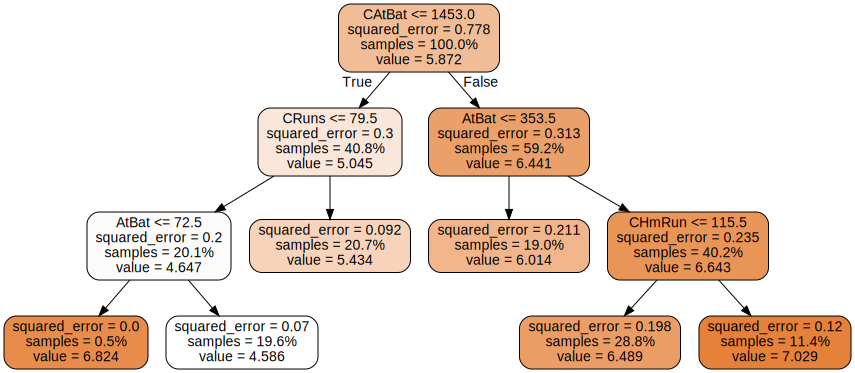

In [67]:
dot_data = export_graphviz(cv.best_estimator_, out_file=None,
                                filled=True, rounded=True,
                                feature_names=features,
                                proportion=True) 

graph = Source(dot_data)
graph

In [68]:
y_train_pred = cv.best_estimator_.predict(X_train)
y_test_pred = cv.best_estimator_.predict(X_test)

MSE_train = mean_squared_error(y_train_pred, y_train)
MSE_test = mean_squared_error(y_test_pred, y_test)

print('Erro Treino:', MSE_train)
print('Erro Teste:', MSE_test)

Erro Treino: 0.14357285546470447
Erro Teste: 0.3286310491048884


Salvando o modelo de árvore estimado.

In [69]:
import pickle

filename = '/content/drive/MyDrive/Data/modelo_final_arvore_reg.sav'
pickle.dump(cv.best_estimator_, open(filename, 'wb'))

Carregando o modelo

In [70]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model

DecisionTreeRegressor(ccp_alpha=0.02, random_state=123)

##Árvores de Decisão para Classificação

Importantdo a base de Crédito e inspecionando os 10 primeiros objetos.

In [ ]:
df_data = pd.read_csv('/content/drive/MyDrive/Data/Default.csv')
#df_adv = df_adv.iloc[: , 1:] #remove primeira coluna.
df_data.head(10)

Convertendo as colunas de default e student de texto para números binários.

In [ ]:
from sklearn.preprocessing import LabelEncoder

ord_enc = LabelEncoder()
df_data["default"] = ord_enc.fit_transform(df_data[["default"]])
df_data["student"] = ord_enc.fit_transform(df_data[["student"]])

df_data.head()

Calculando resumos estatísticos de todos os atributos.

In [ ]:
df_data.describe()

Plotando histogramas de cada coluna.

In [ ]:
df_data.hist(column=["default","student", "balance","income"], layout=(1,4), figsize=(16,4))

Vamos criar duas subamostras contendo 70% das observações para Treino e 30% das observações para teste.

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_data,test_size=0.3, random_state=24)

X_train = df_train[['student','balance','income']].values.reshape(-1,np.size([['student','balance','income']]))
X_test = df_test[['student','balance','income']].values.reshape(-1,np.size([['student','balance','income']]))
y_train = df_train['default'].values.reshape(-1,1)
y_test = df_test['default'].values.reshape(-1,1)

Estimando uma árvore de decisão usando a função DecisionTreeClassifier do pacote tree do Scikit Learn.Procurando o melhor alpha usando o método de validação cruzada (cross-validation).

In [ ]:
from sklearn.model_selection import GridSearchCV

#vamos procura pelo melhor alpha usando valores de 0.001 até 1 com incrementos de 0.001.
params = {'ccp_alpha':list(np.arange(0.001,1.0,0.001))}

modelo_class = DecisionTreeClassifier(criterion='gini', random_state=123)

#utilizaremos 5 folds, k=5
cv = GridSearchCV(modelo_class, param_grid=params, scoring='roc_auc',
                  n_jobs=None, refit=True, cv=5, verbose=2,
                  pre_dispatch=None, error_score=np.nan, return_train_score=True)

In [ ]:
cv.fit(X_train, y_train)

Armazendo os resultados da validação cruzada num Data Frame.

In [ ]:
cv_results_df = pd.DataFrame(cv.cv_results_)
cv_results_df

Listando os campos da validação cruzada.

In [ ]:
cv_results_df.info()

Plotanto o erro médio quadrado para cada nível de alpha para a base de treino e validação.

In [ ]:
ax = plt.axes()
ax.errorbar(cv_results_df['param_ccp_alpha'],
            cv_results_df['mean_train_score'],
            label='Mean training scores')
ax.errorbar(cv_results_df['param_ccp_alpha'],
            cv_results_df['mean_test_score'],
            label='Mean validation scores')
ax.legend()
plt.xlabel('alpha')
plt.ylabel('AUC')

Melhor parâmetro estimado pela validação cruzada.

In [ ]:
cv.best_params_

Características da árvore do melhor estimador.

In [ ]:
print('Profundida da árvore:', cv.best_estimator_.get_depth())
print('Número de folhas:', cv.best_estimator_.get_n_leaves())

In [ ]:
dot_data = export_graphviz(cv.best_estimator_, out_file=None,
                                filled=True, rounded=True,
                                feature_names=['student','balance','income'],
                                proportion=True) 

graph = Source(dot_data)
graph

Calculando o MSE para a base de Treino e Teste.

PS. Não confundir teste com validação!!!!

In [ ]:
y_train_pred = cv.best_estimator_.predict_proba(X_train)[:,1]
y_test_pred = cv.best_estimator_.predict_proba(X_test)[:,1]

AUC_train = roc_auc_score(y_train, y_train_pred)
AUC_test = roc_auc_score(y_test, y_test_pred)


print('AUC Treino:', AUC_train)
print('AUC Teste:', AUC_test)